### Agenda
   
    1. PCA Demo
        ♦ Problem Description
        ♦ Data Understanding
        ♦ Retreiving pricipal components
    
    2. Case Study - House price prediction
        ♦ Problem Description
        ♦ Data Understanding
        ♦ Split the data into Train and Validation sets
        ♦ Build a Multiple linear regression model
        ♦ Generate PCA Transformed features on train data
        ♦ Build a Multiple linear regression model with PCA transformed numeric features and categorical features 

### Problem Description

This is an inbuit dataset in R (For more details run - "?attitude")

From a survey of the clerical employees of a large financial organization, the data are aggregated from the questionnaires of the approximately 35 employees for each of 30 (randomly selected) departments. The numbers give the percent proportion of favourable responses to seven questions in each department.

rating	   - Overall rating (Target)

complaints - Handling of employee complaints

privileges - Does not allow special privileges

learning   - Opportunity to learn

raises     - Raises based on performance

critical   - Too critical

advancel   - Advancement

In [1]:
## Attitude is a built in dataset

head(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43,51,30,39,61,92,45
2,63,64,51,54,63,73,47
3,71,70,68,69,76,86,48
4,61,63,45,47,54,84,35
5,81,78,56,66,71,83,47
6,43,55,49,44,54,49,34


In [2]:
## Store the independent variables into the variable "data"

data  <- attitude[,-1]

head(data)

,complaints,privileges,learning,raises,critical,advance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,51,30,39,61,92,45
2,64,51,54,63,73,47
3,70,68,69,76,86,48
4,63,45,47,54,84,35
5,78,56,66,71,83,47
6,55,49,44,54,49,34


In [3]:
## Standardize the data

data = scale(data)

head(data)

complaints,privileges,learning,raises,critical,advance
-1.1716323,-1.8906841,-1.4796496,-0.3494522,1.7416366,0.2008675
-0.1952721,-0.1743570,-0.2016413,-0.1570932,-0.1785430,0.3952554
0.2553558,1.2150506,1.0763670,1.0932404,1.1352641,0.4924494
-0.2703767,-0.6647362,-0.7980452,-1.0227087,0.9331399,-0.7710720
0.8561929,0.2342923,0.8207653,0.6123428,0.8320778,0.3952554
-0.8712138,-0.3378168,-1.0536469,-1.0227087,-2.6040331,-0.8682660


#### Princomp

In [4]:
## Compute PCA vectors using princomp

pca_object = princomp(data)

In [5]:
## PCA loadings

pca_object$loadings


Loadings:
           Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
complaints  0.439  0.313  0.445  0.316  0.192  0.612
privileges  0.395  0.309  0.217 -0.815        -0.190
learning    0.461  0.217 -0.272  0.225 -0.776 -0.118
raises      0.493 -0.116         0.365  0.460 -0.631
critical    0.225 -0.802  0.457        -0.289       
advance     0.381 -0.321 -0.687 -0.206  0.255  0.416

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

In [6]:
## Importance of components

summary(pca_object)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.7503092 0.9863072 0.8587656 0.73082094 0.55377938
Proportion of Variance 0.5282039 0.1677245 0.1271515 0.09208608 0.05287441
Cumulative Proportion  0.5282039 0.6959283 0.8230798 0.91516586 0.96804027
                           Comp.6
Standard deviation     0.43054202
Proportion of Variance 0.03195973
Cumulative Proportion  1.00000000

In [7]:
## compute PCA transformed values using the pca_object

head(predict(pca_object,data))

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
-1.6478986,-2.6925346,0.1262772,0.49475465,0.2392171,0.2219666
-0.2146741,-0.1240326,-0.4239115,-0.08579552,0.1923724,0.1908807
2.0697681,-0.5063506,0.2721779,-0.48305343,-0.4394052,-0.6211254
-1.3370825,-0.8461801,0.9025611,-0.03120448,-0.3946255,0.4335425
1.4866205,-0.3468409,0.3213509,0.32325249,-0.3215994,0.2088900
-2.4221858,1.8802802,-0.7749353,-0.17140146,0.6979223,-0.2113671


### Case Study - House price prediction

### Problem Description


The data is collected by US Census Service concerning the housing in Boston. Given the
attributes related to the area and house, can we predict the house price value. The description
of attributes are given below

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [8]:
# Read the data
data<-read.csv("/home/datasets/lab/course_06/Housing_Data.csv",stringsAsFactors = T)


### Data Understanding

Check the number of observations and attributes

Classify independent variables and dependent variable

In Linear Regression, the dependent variable is continuous variable.

For Multiple Linear Regression we will predict dependent variable with multiple independent variables.


In [9]:
## Dimensions

dim(data)

[1] 506  14

In [10]:
## Structure

str(data)

'data.frame':	506 obs. of  14 variables:
 $ CRIM : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN   : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS: num  2.31 7.07 7.07 2.18 2.18 ...
 $ CHAS : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX  : num  0.538 0.469 0.469 0.458 0.458 ...
 $ RM   : num  6.57 6.42 7.18 7 7.15 ...
 $ AGE  : num  65.2 78.9 61.1 45.8 54.2 ...
 $ DIS  : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD  : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX  : int  296 242 242 222 222 222 311 311 311 311 ...
 $ PT   : num  15.3 17.8 17.8 18.7 18.7 ...
 $ B    : num  391 397 393 395 397 ...
 $ LSTAT: num  4.98 9.14 4.03 2.94 5.33 ...
 $ MV   : num  24 21.6 34.7 33.4 36.2 ...


In [11]:
## First few rows

head(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,391.34,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [12]:
## Last few rows

tail(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
501,0.22438,0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0,11.93,0,0.538,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
506,0.04741,0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


### Summary Statistics

In [13]:
summary(data)

      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08227   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.26169   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.59671   Mean   : 11.17   Mean   :11.13   Mean   :0.06917  
 3rd Qu.: 3.64742   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
                                                                      
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.888   1st Qu.: 45.02   1st Qu.: 2.101  
 Median :0.5380   Median :6.209   Median : 77.70   Median : 3.191  
 Mean   :0.5538   Mean   :6.288   Mean   : 68.55   Mean   : 3.787  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 93.97   3rd Qu.: 5.118  
 Max.   :0.8710   Max.  

### Split the data into Train and Validation sets

In [14]:
## Split row numbers into 2 sets
set.seed(1)
train_rows = sample(1:nrow(data), size=0.7*nrow(data))
validation_rows = setdiff(1:nrow(data),train_rows)

In [15]:
## Subset into Train and Validation sets
train_data <- data[train_rows,]
validation_data <- data[validation_rows,]

In [16]:
## View the dimensions of the data
dim(data)
dim(train_data)
dim(validation_data)

[1] 506  14

[1] 354  14

[1] 152  14

### Data Type Conversion
Check if any data type conversions have to be done.


In [17]:
str(train_data)

'data.frame':	354 obs. of  14 variables:
 $ CRIM : num  0.11 0.284 2.01 0.325 25.941 ...
 $ ZN   : num  0 0 0 0 0 0 70 20 0 0 ...
 $ INDUS: num  11.93 9.69 19.58 21.89 18.1 ...
 $ CHAS : int  0 0 0 0 0 0 0 1 0 0 ...
 $ NOX  : num  0.573 0.493 0.605 0.624 0.679 ...
 $ RM   : num  6.79 5.71 7.93 6.43 5.3 ...
 $ AGE  : num  89.3 74.3 96.2 98.8 89.1 ...
 $ DIS  : num  2.39 4.72 2.05 1.81 1.65 ...
 $ RAD  : int  1 5 5 4 24 24 5 3 24 3 ...
 $ TAX  : int  273 287 403 437 666 666 358 223 666 193 ...
 $ PT   : num  21 19.6 14.7 21.2 20.2 ...
 $ B    : num  393 391 369 397 127 ...
 $ LSTAT: num  6.48 11.74 3.7 15.39 26.64 ...
 $ MV   : num  22 18.5 50 18 10.4 ...


In [18]:
str(validation_data)

'data.frame':	152 obs. of  14 variables:
 $ CRIM : num  0.069 0.0299 0.0883 0.1445 0.2112 ...
 $ ZN   : num  0 0 12.5 12.5 12.5 12.5 12.5 12.5 0 0 ...
 $ INDUS: num  2.18 2.18 7.87 7.87 7.87 ...
 $ CHAS : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX  : num  0.458 0.458 0.524 0.524 0.524 ...
 $ RM   : num  7.15 6.43 6.01 6.17 5.63 ...
 $ AGE  : num  54.2 58.7 66.6 96.1 100 ...
 $ DIS  : num  6.06 6.06 5.56 5.95 6.08 ...
 $ RAD  : int  3 3 5 5 5 5 5 5 4 4 ...
 $ TAX  : int  222 222 311 311 311 311 311 311 307 307 ...
 $ PT   : num  18.7 18.7 15.2 15.2 15.2 ...
 $ B    : num  397 394 396 397 387 ...
 $ LSTAT: num  5.33 5.21 12.43 19.15 11.43 ...
 $ MV   : num  36.2 28.7 22.9 27.1 16.5 ...


In [19]:
#Convert "CHAS" to factor variable
train_data$CHAS <- as.factor(as.character(train_data$CHAS))
validation_data$CHAS  <- as.factor(as.character(validation_data$CHAS))

#Convert "RAD" to factor variable
train_data$RAD <- as.factor(train_data$RAD)
validation_data$RAD  <- as.factor(validation_data$RAD)



In [20]:
str(train_data)

'data.frame':	354 obs. of  14 variables:
 $ CRIM : num  0.11 0.284 2.01 0.325 25.941 ...
 $ ZN   : num  0 0 0 0 0 0 70 20 0 0 ...
 $ INDUS: num  11.93 9.69 19.58 21.89 18.1 ...
 $ CHAS : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...
 $ NOX  : num  0.573 0.493 0.605 0.624 0.679 ...
 $ RM   : num  6.79 5.71 7.93 6.43 5.3 ...
 $ AGE  : num  89.3 74.3 96.2 98.8 89.1 ...
 $ DIS  : num  2.39 4.72 2.05 1.81 1.65 ...
 $ RAD  : Factor w/ 9 levels "1","2","3","4",..: 1 5 5 4 9 9 5 3 9 3 ...
 $ TAX  : int  273 287 403 437 666 666 358 223 666 193 ...
 $ PT   : num  21 19.6 14.7 21.2 20.2 ...
 $ B    : num  393 391 369 397 127 ...
 $ LSTAT: num  6.48 11.74 3.7 15.39 26.64 ...
 $ MV   : num  22 18.5 50 18 10.4 ...


In [21]:
str(validation_data)

'data.frame':	152 obs. of  14 variables:
 $ CRIM : num  0.069 0.0299 0.0883 0.1445 0.2112 ...
 $ ZN   : num  0 0 12.5 12.5 12.5 12.5 12.5 12.5 0 0 ...
 $ INDUS: num  2.18 2.18 7.87 7.87 7.87 ...
 $ CHAS : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ NOX  : num  0.458 0.458 0.524 0.524 0.524 ...
 $ RM   : num  7.15 6.43 6.01 6.17 5.63 ...
 $ AGE  : num  54.2 58.7 66.6 96.1 100 ...
 $ DIS  : num  6.06 6.06 5.56 5.95 6.08 ...
 $ RAD  : Factor w/ 9 levels "1","2","3","4",..: 3 3 5 5 5 5 5 5 4 4 ...
 $ TAX  : int  222 222 311 311 311 311 311 311 307 307 ...
 $ PT   : num  18.7 18.7 15.2 15.2 15.2 ...
 $ B    : num  397 394 396 397 387 ...
 $ LSTAT: num  5.33 5.21 12.43 19.15 11.43 ...
 $ MV   : num  36.2 28.7 22.9 27.1 16.5 ...


### Handling Missing values

In [22]:
# Missing values
sum(is.na(train_data))

sum(is.na(validation_data))

[1] 4

[1] 2

In [23]:
## Check column wise missing values
colSums(is.na(train_data))

colSums(is.na(validation_data))

CRIM    ZN INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX    PT     B LSTAT 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
   MV 
    4

CRIM    ZN INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX    PT     B LSTAT 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
   MV 
    2

In [24]:
#In this problem we are trying to predict the median value of house given the features. 
# But we have missing values in the target. So there is no point in imputing them.

train_data = train_data[!is.na(train_data$MV),]
validation_data = validation_data[!is.na(validation_data$MV),]

In [25]:
## Check column wise missing values
colSums(is.na(train_data))

colSums(is.na(validation_data))

CRIM    ZN INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX    PT     B LSTAT 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
   MV 
    0

CRIM    ZN INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX    PT     B LSTAT 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
   MV 
    0

### Model Building

In [26]:
# Build a linear model on this data
lin_reg = lm(MV ~ .,data=train_data)

summary(lin_reg)


Call:
lm(formula = MV ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1543  -2.6716  -0.5632   1.6623  24.0590 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.094721   6.355299   3.477 0.000576 ***
CRIM         -0.070622   0.043054  -1.640 0.101900    
ZN            0.039321   0.016733   2.350 0.019370 *  
INDUS         0.022366   0.073032   0.306 0.759609    
CHAS1         3.505639   0.959084   3.655 0.000299 ***
NOX         -13.938937   4.556327  -3.059 0.002401 ** 
RM            4.981062   0.508783   9.790  < 2e-16 ***
AGE          -0.016049   0.015584  -1.030 0.303848    
DIS          -1.316043   0.236641  -5.561 5.55e-08 ***
RAD2          1.364941   1.686401   0.809 0.418881    
RAD3          4.014483   1.543831   2.600 0.009733 ** 
RAD4          2.646670   1.323452   2.000 0.046341 *  
RAD5          3.372678   1.349023   2.500 0.012902 *  
RAD6          1.230539   1.646187   0.748 0.455290    
RAD7     

In [27]:
## Predict and evaluate
pred_train = predict(lin_reg,newdata=train_data)
pred_validation = predict(lin_reg,newdata=validation_data)

library(DMwR)
regr.eval(train_data$MV,pred_train)
regr.eval(validation_data$MV,pred_validation)

Loading required package: lattice

Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



mae        mse       rmse       mape 
 3.1945257 20.5100096  4.5287978  0.1660483

mae        mse       rmse       mape 
 3.5767196 27.3761500  5.2322223  0.1869164

### PCA

We know that principal components are obtained on numeric data. 

From the data description, we understand that CHAS and RAD are categorical, hence we shall keep these two

variables out which constructing principal components


##### Standardization

In [28]:
## Select numeric independent variables to standardize

library(dplyr)

num_cols = colnames(select_if(train_data,is.numeric))

independent_num_cols = setdiff(num_cols,"MV")

independent_num_cols


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "CRIM"  "ZN"    "INDUS" "NOX"   "RM"    "AGE"   "DIS"   "TAX"   "PT"   
[10] "B"     "LSTAT"

In [29]:
## Standardize numeric independent variables  

library(caret)

std_model <- preProcess(train_data[, independent_num_cols], method = c("scale","center"))
std_model


Loading required package: ggplot2



Created from 350 samples and 11 variables

Pre-processing:
  - centered (11)
  - ignored (0)
  - scaled (11)


In [30]:
## Standardize train data

train_data[, independent_num_cols] <- predict(object = std_model, newdata = train_data[, independent_num_cols])

head(train_data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
505,-0.4082096,-0.4865396,0.1178454,0,0.1880957,0.6533680,0.7584820,-0.6716689,1,-0.79185380,1.1793517,0.4119581,-0.8447774,22.0
324,-0.3867052,-0.4865396,-0.2072454,0,-0.5009624,-0.8515440,0.2374989,0.4337206,5,-0.70790565,0.5296808,0.3873252,-0.1049784,18.5
167,-0.1737618,-0.4865396,1.2280881,0,0.4637190,2.2261808,0.9981341,-0.8342401,5,-0.01233524,-1.7441680,0.1555427,-1.2357739,50.0
129,-0.3815847,-0.4865396,1.5633378,0,0.6273702,0.1503450,1.0884380,-0.9448644,4,0.19153885,1.2721622,0.4485886,0.4083804,18.0
418,2.7781650,-0.4865396,1.0132961,0,1.1010977,-1.4113827,0.7515354,-1.0230692,24,1.56469078,0.8081115,-2.4132808,1.9906502,10.4
471,0.1147154,-0.4865396,1.0132961,0,0.2483881,-0.2154905,0.5744012,-0.3661961,24,1.56469078,0.8081115,0.4485886,0.5349621,19.9


In [31]:
## Standardize validation data

validation_data[, independent_num_cols] <- predict(object = std_model, newdata = validation_data[, independent_num_cols])

head(validation_data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,-0.4132104,-0.48653959,-1.2971699,0,-0.8024253,1.1425332,-0.46061850,1.069360,3,-1.0976649,0.1120354,0.4485886,-1.006520612,36.2
6,-0.4180459,-0.48653959,-1.2971699,0,-0.8024253,0.1489587,-0.30432357,1.069360,3,-1.0976649,0.1120354,0.4190717,-1.023398142,28.7
7,-0.4108370,0.06023942,-0.4713815,0,-0.2339525,-0.4302796,-0.02993922,0.831570,5,-0.5639945,-1.5121427,0.4347859,-0.007932401,22.9
8,-0.4038971,0.06023942,-0.4713815,0,-0.2339525,-0.2085617,0.99466089,1.016418,5,-0.5639945,-1.5121427,0.4485886,0.937210094,27.1
9,-0.3956706,0.06023942,-0.4713815,0,-0.2339525,-0.9582460,1.13011655,1.078792,5,-0.5639945,-1.5121427,0.3395460,-0.148578688,16.5
10,-0.4007528,0.06023942,-0.4713815,0,-0.2339525,-0.4413654,0.64039249,1.320516,5,-0.5639945,-1.5121427,0.3403952,0.648885452,18.9


In [32]:
## Create a PCA Object on standardized variables

pca_object = princomp(train_data[,independent_num_cols])

In [33]:
## PCA Loadings

pca_object$loadings


Loadings:
      Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
CRIM   0.259  0.399  0.317         0.273  0.660  0.313  0.154         0.143 
ZN    -0.279  0.344  0.294 -0.282  0.409 -0.243 -0.473  0.328  0.254 -0.123 
INDUS  0.362 -0.101                0.160 -0.432  0.172  0.563 -0.392  0.361 
NOX    0.359 -0.220  0.175 -0.174  0.138 -0.200        -0.300  0.247 -0.247 
RM    -0.226 -0.309  0.544  0.489  0.114  0.103 -0.231        -0.456 -0.128 
AGE    0.337 -0.318                       0.224 -0.582 -0.113  0.219  0.561 
DIS   -0.340  0.399 -0.111               -0.113        -0.412 -0.284  0.536 
TAX    0.334  0.220  0.193  0.183  0.374 -0.354  0.127 -0.496               
PT     0.214  0.311 -0.430  0.687               -0.288  0.146  0.153 -0.141 
B     -0.211 -0.351 -0.466         0.743  0.200                             
LSTAT  0.335  0.201 -0.182 -0.369         0.200 -0.381        -0.590 -0.364 
      Comp.11
CRIM   0.136 
ZN           
INDUS  0.119 
NOX    0.

In [34]:
## PCA Components Importance

summary(pca_object)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.3610083 1.1041845 1.0570046 0.87096072 0.77003773
Proportion of Variance 0.5082121 0.1111561 0.1018600 0.06915874 0.05405974
Cumulative Proportion  0.5082121 0.6193681 0.7212281 0.79038688 0.84444661
                           Comp.6     Comp.7     Comp.8    Comp.9    Comp.10
Standard deviation     0.71090620 0.63743369 0.47371118 0.4575137 0.43370870
Proportion of Variance 0.04607597 0.03704418 0.02045866 0.0190835 0.01714929
Cumulative Proportion  0.89052259 0.92756677 0.94802543 0.9671089 0.98425823
                          Comp.11
Standard deviation     0.41552952
Proportion of Variance 0.01574177
Cumulative Proportion  1.00000000

In [35]:
## Get PCA transformed train data

train_data_pca_transformed = predict(pca_object, train_data[,independent_num_cols])

head(train_data_pca_transformed)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11
505,0.094685019,-1.215448370,-0.4781696,1.36158358,-0.05388943,0.2227936,-0.50392916,0.58014195,0.59526149,0.1186374,0.47635181
324,-0.334179753,0.021864933,-1.3800408,0.02665146,-0.42628814,0.2562877,-0.08083747,0.04764883,0.27381912,0.4886224,0.07238535
167,-0.005359866,-2.648474694,2.1228599,0.34593163,0.34216782,-0.2200462,0.34366614,0.39249254,-0.60943481,0.8819785,-0.06527647
129,1.861689150,-1.022399533,-0.7223453,0.77208753,0.51558764,-0.5115502,-0.66666716,0.76865724,-0.25482711,0.1531976,0.25063331
418,4.410317658,2.226841756,1.0212538,-0.43575433,-0.56664262,0.7653514,0.26330469,0.17829180,0.07235677,-0.1660827,-0.04634154
471,1.768973109,0.004706455,-0.4717692,0.56702944,0.94692942,-0.5321163,-0.01114607,-0.28273884,-0.42509655,0.1838838,-0.53828492


In [36]:
## Get PCA transformed validation data

validation_data_pca_transformed = predict(pca_object, validation_data[,independent_num_cols])

head(validation_data_pca_transformed)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11
5,-2.2810427,-0.3706896,-0.2127497,1.0582206,-0.4960849,0.7317011,0.03783943,-0.5049904,-0.1373807,0.2493276,0.44965149
6,-2.0045485,-0.1084898,-0.7311395,0.5743267,-0.6286734,0.6520152,0.17917377,-0.4956355,0.3623543,0.4709912,0.30181218
7,-1.1800895,-0.3187383,-0.1382494,-1.3824950,-0.2118314,0.1602178,0.22286556,-0.5316560,-0.1636178,0.5137302,-0.04992936
8,-0.6319504,-0.4513613,-0.1719735,-1.6691819,-0.2044513,0.5876110,-0.79307274,-0.8107280,-0.6513457,0.8161553,-0.10670340
9,-0.7770850,-0.4144546,-0.3300994,-1.6357845,-0.3007126,0.3001000,-0.29522080,-0.7312878,0.3534262,1.4222006,-0.16721579
10,-0.8751155,-0.1643691,-0.2429694,-1.6689883,-0.2942821,0.3728595,-0.45050097,-0.8590192,-0.5296158,0.9195362,0.03859284


In [37]:
## Get the column names of target and categorical columns to build a regression model

target_cat_cols = setdiff(colnames(train_data),independent_num_cols)
target_cat_cols

[1] "CHAS" "RAD"  "MV"

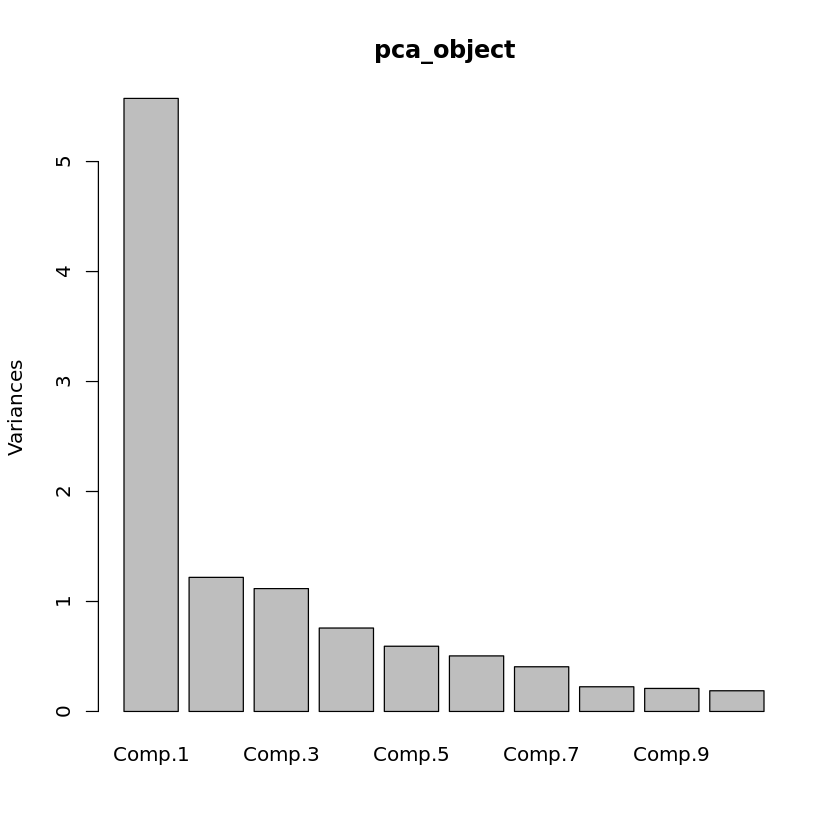

In [38]:
## Plot

plot(pca_object)

In [39]:
## Combine PCA transformed train data with categorical and target attributes

train_data_pca_1comp = data.frame(train_data_pca_transformed[,1,drop=F],train_data[,target_cat_cols])

head(train_data_pca_1comp)

,Comp.1,CHAS,RAD,MV
,<dbl>,<fct>,<fct>,<dbl>
505,0.094685019,0,1,22.0
324,-0.334179753,0,5,18.5
167,-0.005359866,0,5,50.0
129,1.861689150,0,4,18.0
418,4.410317658,0,24,10.4
471,1.768973109,0,24,19.9


In [40]:
## Combine PCA transformed validation data with categorical and target attributes

validation_data_pca_1comp = data.frame(validation_data_pca_transformed[,1,drop=F],validation_data[,target_cat_cols])

head(validation_data_pca_1comp)

,Comp.1,CHAS,RAD,MV
,<dbl>,<fct>,<fct>,<dbl>
5,-2.2810427,0,3,36.2
6,-2.0045485,0,3,28.7
7,-1.1800895,0,5,22.9
8,-0.6319504,0,5,27.1
9,-0.7770850,0,5,16.5
10,-0.8751155,0,5,18.9


In [41]:
# Build a linear model on the data with 1 principal component
lin_reg = lm(MV ~ .,data=train_data_pca_1comp)

summary(lin_reg)


Call:
lm(formula = MV ~ ., data = train_data_pca_1comp)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.730  -3.809  -1.357   2.394  25.969 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.0756     1.7500   9.758  < 2e-16 ***
Comp.1       -3.1269     0.2385 -13.110  < 2e-16 ***
CHAS1         6.5671     1.3348   4.920 1.35e-06 ***
RAD2          5.7822     2.3405   2.471 0.013982 *  
RAD3          4.5898     2.1476   2.137 0.033301 *  
RAD4          2.3960     1.8715   1.280 0.201323    
RAD5          7.2305     1.8722   3.862 0.000135 ***
RAD6          1.5056     2.3246   0.648 0.517632    
RAD7          3.2039     2.4400   1.313 0.190054    
RAD8          9.2569     2.3857   3.880 0.000125 ***
RAD24         7.8637     2.2223   3.538 0.000459 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.756 on 339 degrees of freedom
Multiple R-squared:  0.5193,	Adjusted R-squared:  0.5051 
F-statistic: 36

In [42]:
## Predict and Evaluate
pred_train = predict(lin_reg,newdata=train_data_pca_1comp)
pred_validation = predict(lin_reg,newdata=validation_data_pca_1comp)

library(DMwR)
regr.eval(train_data_pca_1comp$MV,pred_train)
regr.eval(validation_data_pca_1comp$MV,pred_validation)

mae        mse       rmse       mape 
 4.7668983 44.2155135  6.6494747  0.2166006

mae        mse       rmse       mape 
 4.8837610 44.1639934  6.6455996  0.2369034

#### Pick Principal Components

In [43]:
summary(pca_object)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.3610083 1.1041845 1.0570046 0.87096072 0.77003773
Proportion of Variance 0.5082121 0.1111561 0.1018600 0.06915874 0.05405974
Cumulative Proportion  0.5082121 0.6193681 0.7212281 0.79038688 0.84444661
                           Comp.6     Comp.7     Comp.8    Comp.9    Comp.10
Standard deviation     0.71090620 0.63743369 0.47371118 0.4575137 0.43370870
Proportion of Variance 0.04607597 0.03704418 0.02045866 0.0190835 0.01714929
Cumulative Proportion  0.89052259 0.92756677 0.94802543 0.9671089 0.98425823
                          Comp.11
Standard deviation     0.41552952
Proportion of Variance 0.01574177
Cumulative Proportion  1.00000000

In [44]:
## Combine PCA transformed train data with categorical and target attributes

train_data_pca_5comp = data.frame(train_data_pca_transformed[,1:5],train_data[,target_cat_cols])

head(train_data_pca_5comp)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,CHAS,RAD,MV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
505,0.094685019,-1.215448370,-0.4781696,1.36158358,-0.05388943,0,1,22.0
324,-0.334179753,0.021864933,-1.3800408,0.02665146,-0.42628814,0,5,18.5
167,-0.005359866,-2.648474694,2.1228599,0.34593163,0.34216782,0,5,50.0
129,1.861689150,-1.022399533,-0.7223453,0.77208753,0.51558764,0,4,18.0
418,4.410317658,2.226841756,1.0212538,-0.43575433,-0.56664262,0,24,10.4
471,1.768973109,0.004706455,-0.4717692,0.56702944,0.94692942,0,24,19.9


In [45]:
## Combine PCA transformed validation data with categorical and target attributes

validation_data_pca_5comp = data.frame(validation_data_pca_transformed[,1:5],validation_data[,target_cat_cols])

head(validation_data_pca_5comp)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,CHAS,RAD,MV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
5,-2.2810427,-0.3706896,-0.2127497,1.0582206,-0.4960849,0,3,36.2
6,-2.0045485,-0.1084898,-0.7311395,0.5743267,-0.6286734,0,3,28.7
7,-1.1800895,-0.3187383,-0.1382494,-1.3824950,-0.2118314,0,5,22.9
8,-0.6319504,-0.4513613,-0.1719735,-1.6691819,-0.2044513,0,5,27.1
9,-0.7770850,-0.4144546,-0.3300994,-1.6357845,-0.3007126,0,5,16.5
10,-0.8751155,-0.1643691,-0.2429694,-1.6689883,-0.2942821,0,5,18.9


In [46]:
# Build a linear model on the data with 5 princial components
lin_reg = lm(MV ~ .,data=train_data_pca_5comp)


summary(lin_reg)


Call:
lm(formula = MV ~ ., data = train_data_pca_5comp)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4587  -2.6664  -0.5574   1.7879  25.3619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.0237     1.2646  15.044  < 2e-16 ***
Comp.1       -2.9596     0.2071 -14.294  < 2e-16 ***
Comp.2       -3.3665     0.3040 -11.073  < 2e-16 ***
Comp.3        2.8988     0.2825  10.261  < 2e-16 ***
Comp.4        1.7158     0.3360   5.107  5.5e-07 ***
Comp.5        0.9266     0.3841   2.412 0.016388 *  
CHAS1         3.8629     0.9820   3.934 0.000102 ***
RAD2          2.4174     1.7027   1.420 0.156618    
RAD3          4.3329     1.5701   2.760 0.006104 ** 
RAD4          2.9421     1.3574   2.167 0.030907 *  
RAD5          3.4228     1.3724   2.494 0.013113 *  
RAD6          1.3814     1.6704   0.827 0.408844    
RAD7          3.7568     1.7631   2.131 0.033835 *  
RAD8          4.3162     1.7560   2.458 0.014477 *  
RAD24         5.5197     1.77

In [47]:
## Predict and Evaluate
pred_train = predict(lin_reg,newdata=train_data_pca_5comp)
pred_validation = predict(lin_reg,newdata=validation_data_pca_5comp)

library(DMwR)
regr.eval(train_data_pca_5comp$MV,pred_train)
regr.eval(validation_data_pca_5comp$MV,pred_validation)

mae        mse       rmse       mape 
 3.2905874 22.4184917  4.7348170  0.1739021

mae        mse       rmse       mape 
 3.6465548 30.9691097  5.5649896  0.1922601